In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

### Get Information from WIKI

In [2]:
url="https://en.wikipedia.org/wiki/CAF_Champions_League#Performance_by_clubs.html"
page=requests.get(url).text

In [3]:
soup=BeautifulSoup(page,'html.parser')
tables=soup.find_all('table')

### Get Specific Table From Page

In [4]:
wanted_table_index=0
title_of_wanted_table="Performances in the African Cup of Champions Clubs and CAF Champions League by club"

In [5]:
for i,t in enumerate (tables) :
    if title_of_wanted_table in str(t):
        wanted_table_index=i
CAF_Champions=tables[wanted_table_index]

### Convert The Table to Pandas  Data Frame

In [6]:
CAF_data=pd.DataFrame(columns=['Club','Titles','Runners Up','Seasons won','Seasons runner-up'])

for i, row in enumerate(CAF_Champions.tbody.find_all('tr') ):
    if i==0: continue
    col=row.find_all('td')
    name=row.find('th').text.strip()
    titles=col[0].text.strip()
    runners=col[1].text.strip()
    seasons_won=col[2].text.strip()
    seasons_runner=col[3].text.strip()
    CAF_data=CAF_data.append({"Club":name ,"Titles":titles ,"Runners Up" :runners,
                              "Seasons won":seasons_won ,"Seasons runner-up":seasons_runner},
                                ignore_index=True)

### Edit data type

In [7]:
CAF_data["Titles"]=CAF_data["Titles"].astype(int)
CAF_data["Runners Up"]=CAF_data["Runners Up"].astype(int)

In [8]:
CAF_data.head()

,Club,Titles,Runners Up,Seasons won,Seasons runner-up
0,Al Ahly,10,4,"1982, 1987, 2001, 2005, 2006, 2008, 2012, 2013...","1983, 2007, 2017, 2018"
1,Zamalek,5,3,"1984, 1986, 1993, 1996, 2002","1994, 2016, 2020"
2,TP Mazembe,5,2,"1967, 1968, 2009, 2010, 2015","1969, 1970"
3,ES Tunis,4,4,"1994, 2011, 2018, 2019","1999, 2000, 2010, 2012"
4,Hafia FC,3,2,"1972, 1975, 1977","1976, 1978"


### Add New Feature 

In [9]:
CAF_data["Rate Win In Final"]=(CAF_data['Titles'])/(CAF_data['Titles'] + CAF_data['Runners Up']) *100

In [10]:
CAF_data["Rate Win In Final"]=round(CAF_data["Rate Win In Final"],2)
CAF_data["Rate Win In Final"]= CAF_data["Rate Win In Final"].replace(0,"__")

In [11]:
CAF_data.head(10)

,Club,Titles,Runners Up,Seasons won,Seasons runner-up,Rate Win In Final
0,Al Ahly,10,4,"1982, 1987, 2001, 2005, 2006, 2008, 2012, 2013...","1983, 2007, 2017, 2018",71.43
1,Zamalek,5,3,"1984, 1986, 1993, 1996, 2002","1994, 2016, 2020",62.5
2,TP Mazembe,5,2,"1967, 1968, 2009, 2010, 2015","1969, 1970",71.43
3,ES Tunis,4,4,"1994, 2011, 2018, 2019","1999, 2000, 2010, 2012",50
4,Hafia FC,3,2,"1972, 1975, 1977","1976, 1978",60
5,Raja Casablanca,3,1,"1989, 1997, 1999",2002,75
6,Canon Yaoundé,3,0,"1971, 1978, 1980",—,100
7,Asante Kotoko,2,5,"1970, 1983","1967, 1971, 1973, 1982, 1993",28.57
8,Wydad AC,2,2,"1992, 2017","2011, 2019",50
9,JS Kabylie,2,0,"1981, 1990",—,100


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

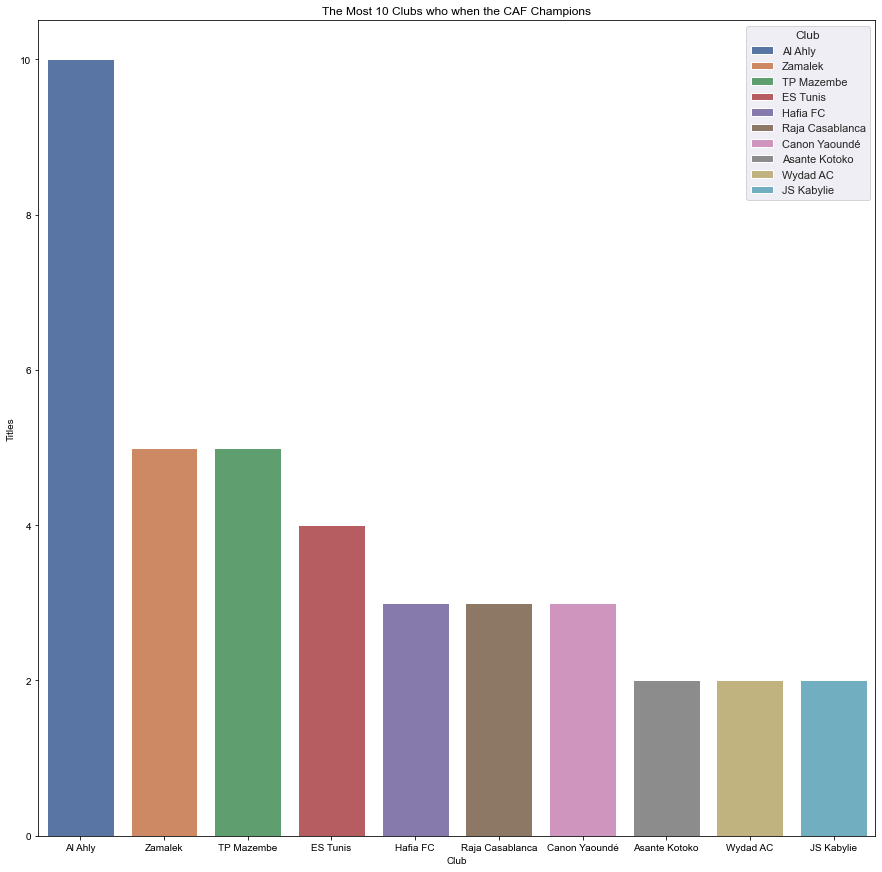

In [13]:
plt.figure(figsize=(15,15))
plt.title("The Most 10 Clubs who when the CAF Champions")
sns.set_theme(style="dark")
sns.barplot(x="Club",y="Titles",hue="Club",dodge=False,data=CAF_data[:10]);